In [ ]:
!nvidia-smi

Wed Aug 10 15:52:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch 

if torch.cuda.is_available():
    device = torch.device('cuda')
    
    print('there are %d GPU(s) available.' % torch.cuda.device_count())
    
    print('we will use the GPU: ', torch.cuda.get_device_name(0))
    
else:
    print("No GPU available, using the GPU instead")
    device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f1053f437e31a03c98f9f242260e646df20c21e6ef35343b96cbdca1598c9023
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=de60b0ed5f00754aaca17dff06b32a1e9aafc152934f555fdb4af57140cf6e29
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from nltk import sent_tokenize, word_tokenize
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, LdaMulticore
# spacy for lemmatization
import spacy
from gensim import corpora, models

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import pandas as pd
from textblob import TextBlob
import nltk
from tqdm import tqdm_notebook as tqdm
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
import pandas as pd
from textblob import TextBlob
import nltk
from tqdm import tqdm_notebook as tqdm
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
import pandas as pd
import re
import nltk
import string 
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Input Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
dat=pd.read_csv("gdrive/My Drive/Colab Notebooks/datawattpad2.csv")
print(dat)

            Date                                               Data  score  \
0     2020-09-16  Wattpad sudah bagus banget, tapi kok makin di ...      5   
1     2020-09-16  Dari dulu jaman SD sampai SMP suka banget sama...      1   
2     2020-09-16  saya mau protes, saya mau login ke akun wattpa...      1   
3     2020-09-16  Wattpad skrng enggak kayak wattpad dulu. Saya ...      1   
4     2020-09-16  Maaf ka.sebelumnya, klo menurut saya bagus yg ...      2   
...          ...                                                ...    ...   
7942  2021-03-14  Suka banget sama wattpad👍, tapi ini di hp lagi...      5   
7943  2021-03-14           Klo boleh jjur kecewa sma wp yg sekarang      2   
7944  2021-03-14  Saya s mencoba app ini di googledan hasilnya b...      3   
7945  2021-03-14  Login susah ribet ,banyak batasan baca cerita ...      3   
7946  2021-03-14  Aplikasi ini sangat bagus!!!!!!!!!!!!!!!!!!!!!...      5   

                                           Data_Cleaned      as

In [ ]:
dat.to_csv('dat.csv')
dat.head()

,Date,Data,score,Data_Cleaned,aspek,kelas
0,2020-09-16,"Wattpad sudah bagus banget, tapi kok makin di ...",5,bagus perbarui puas bagi kutip cerita tidak bi...,pelayanan,2
1,2020-09-16,Dari dulu jaman SD sampai SMP suka banget sama...,1,suka cerita enak fitur baca luas baca cerita m...,pelayanan,0
2,2020-09-16,"saya mau protes, saya mau login ke akun wattpa...",1,protes masuk akun masuk sandi reset akun perba...,tampilan,0
3,2020-09-16,Wattpad skrng enggak kayak wattpad dulu. Saya ...,1,sekarang kecewa baca luar jaringan cerita sisa...,sistem,0
4,2020-09-16,"Maaf ka.sebelumnya, klo menurut saya bagus yg ...",2,bagus baca puas tidak batas sekarang sedih hib...,sistem,0


In [ ]:
data = []
data = dat['Data_Cleaned'].values.tolist()
data

['bagus perbarui puas bagi kutip cerita tidak bisa langsung gambar bagi suka bagi cerita',
 'suka cerita enak fitur baca luas baca cerita malas baca ganti suka',
 'protes masuk akun masuk sandi reset akun perbarui susah',
 'sekarang kecewa baca luar jaringan cerita sisa dalam jaringan iklan slide cerita seru bayar keluar uang kouta tempat beli koin baca baca enak',
 'bagus baca puas tidak batas sekarang sedih hibur bosan murah luar jaringan bintang',
 'tulis baca enak versi lama iklan pasang pakai koin baca cerita tata letak enak pindah tempat enak lama turunin bintang eror',
 ' asik bab selajutnya iklan iklan iklan lama hilang perasaan iklan lama malas sekarang',
 'lama enak perbarui premium unduh ubah boros kuota sekarang pandemi',
 'versi batas cerita luar jaringan efektif bayar sekolah langgan',
 'zaman penulis cerita luar jaringan iklan banding paksa premium tulis gratis bayar',
 'versi lama tidak bagus orang tidak pindah tempat aplikasi baca bagus bagus',
 'perbarui tidak bagus t

In [ ]:
df = pd.read_csv("C:/Users/Acer/Wattpad/datawattpad2.csv.", delimiter=',', skiprows=0, low_memory=False)

In [ ]:
df

,Date,Data,score,Data_Cleaned,aspek,kelas
0,2020-09-16,"Wattpad sudah bagus banget, tapi kok makin di ...",5,bagus perbarui puas bagi kutip cerita tidak bi...,pelayanan,2
1,2020-09-16,Dari dulu jaman SD sampai SMP suka banget sama...,1,suka cerita enak fitur baca luas baca cerita m...,pelayanan,0
2,2020-09-16,"saya mau protes, saya mau login ke akun wattpa...",1,protes masuk akun masuk sandi reset akun perba...,tampilan,0
3,2020-09-16,Wattpad skrng enggak kayak wattpad dulu. Saya ...,1,sekarang kecewa baca luar jaringan cerita sisa...,sistem,0
4,2020-09-16,"Maaf ka.sebelumnya, klo menurut saya bagus yg ...",2,bagus baca puas tidak batas sekarang sedih hib...,sistem,0
...,...,...,...,...,...,...
7942,2021-03-14,"Suka banget sama wattpad👍, tapi ini di hp lagi...",5,suka telfon genggam tidak bisa buka unduh ulang,tampilan,2
7943,2021-03-14,Klo boleh jjur kecewa sma wp yg sekarang,2,jujur kecewa baru,tampilan,0
7944,2021-03-14,Saya s mencoba app ini di googledan hasilnya b...,3,aplikasi google hasil bagus coba unduh bagus b...,pelayanan,1
7945,2021-03-14,"Login susah ribet ,banyak batasan baca cerita ...",3,masuk susah ribet batas baca cerita luar jarin...,sistem,1


In [ ]:
data=df.drop(['Date','Data', 'score','aspek', 'kelas'], axis=1)

In [ ]:
data

,Data_Cleaned
0,bagus perbarui puas bagi kutip cerita tidak bi...
1,suka cerita enak fitur baca luas baca cerita m...
2,protes masuk akun masuk sandi reset akun perba...
3,sekarang kecewa baca luar jaringan cerita sisa...
4,bagus baca puas tidak batas sekarang sedih hib...
...,...
7942,suka telfon genggam tidak bisa buka unduh ulang
7943,jujur kecewa baru
7944,aplikasi google hasil bagus coba unduh bagus b...
7945,masuk susah ribet batas baca cerita luar jarin...


In [ ]:
df['Data_Cleaned']=df['Data_Cleaned'].apply(str)

In [ ]:
data = []
data = dat['Data_Cleaned'].values.tolist()
data

['bagus perbarui puas bagi kutip cerita tidak bisa langsung gambar bagi suka bagi cerita',
 'suka cerita enak fitur baca luas baca cerita malas baca ganti suka',
 'protes masuk akun masuk sandi reset akun perbarui susah',
 'sekarang kecewa baca luar jaringan cerita sisa dalam jaringan iklan slide cerita seru bayar keluar uang kouta tempat beli koin baca baca enak',
 'bagus baca puas tidak batas sekarang sedih hibur bosan murah luar jaringan bintang',
 'tulis baca enak versi lama iklan pasang pakai koin baca cerita tata letak enak pindah tempat enak lama turunin bintang eror',
 ' asik bab selajutnya iklan iklan iklan lama hilang perasaan iklan lama malas sekarang',
 'lama enak perbarui premium unduh ubah boros kuota sekarang pandemi',
 'versi batas cerita luar jaringan efektif bayar sekolah langgan',
 'zaman penulis cerita luar jaringan iklan banding paksa premium tulis gratis bayar',
 'versi lama tidak bagus orang tidak pindah tempat aplikasi baca bagus bagus',
 'perbarui tidak bagus t

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
token = []  
for i in data: 
    token.append(word_tokenize(i))

In [ ]:
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).


bigram = Phrases(token, min_count=5)
trigram = Phrases(bigram[token])

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
#Create a Dictionary

token_postag = make_bigrams(token)

dictionary = Dictionary(token_postag)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.75, min_df=5)
document = [' '.join(d) for d in token_postag]
tf = tf_vectorizer.fit_transform(document)
print(tf.shape)
print(tf)

(7947, 882)
  (0, 52)	1
  (0, 603)	1
  (0, 647)	1
  (0, 49)	3
  (0, 432)	1
  (0, 157)	2
  (0, 819)	1
  (0, 444)	1
  (0, 236)	1
  (0, 766)	1
  (1, 157)	2
  (1, 766)	2
  (1, 215)	1
  (1, 227)	1
  (1, 45)	3
  (1, 472)	1
  (1, 489)	1
  (1, 239)	1
  (2, 603)	1
  (2, 646)	1
  (2, 497)	2
  (2, 16)	2
  (2, 707)	1
  (2, 775)	1
  (3, 157)	2
  :	:
  (7944, 16)	1
  (7944, 775)	1
  (7944, 117)	1
  (7944, 854)	1
  (7944, 34)	1
  (7944, 676)	1
  (7944, 164)	1
  (7944, 258)	2
  (7944, 170)	1
  (7944, 278)	1
  (7944, 551)	1
  (7944, 803)	1
  (7945, 157)	1
  (7945, 45)	1
  (7945, 497)	1
  (7945, 775)	1
  (7945, 471)	1
  (7945, 323)	1
  (7945, 85)	1
  (7945, 80)	1
  (7945, 676)	1
  (7945, 275)	1
  (7946, 52)	1
  (7946, 854)	1
  (7946, 154)	1


In [ ]:
# Clustering Topik

from tqdm import tqdm_notebook as tqdm
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [ ]:
Tf_vectorizer = CountVectorizer(max_df=0.75, min_df=5)

In [ ]:
tf = Tf_vectorizer.fit_transform(data)
tf_term = Tf_vectorizer.get_feature_names()

In [ ]:
n_topics4 = 4
lda4 = LDA(n_components=n_topics4, learning_method='batch', random_state=0).fit(tf)
lda4

LatentDirichletAllocation(n_components=4, random_state=0)

In [ ]:
import pickle, TSutantoSMA as ittc

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\pattern\web\utils.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
Top_Words=15
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics4, Top_Words))
ittc.print_Topics(lda4, tf_term, n_topics4, Top_Words)

Printing top 4 Topics, with top 15 Words:
Topic #1:
jaringan luar baca cerita versi lama kecewa suka batas dalam enak sekarang perpustakaan perbarui bagus
Topic #2:
cerita tidak unduh bagus lama aplikasi baca baru hilang novel hapus suka kesal eror tulis
Topic #3:
bagus cerita suka aplikasi baca masuk akun tulis email coba halusinasi keluar keren tarik bintang
Topic #4:
iklan baca jelek fitur ganggu kecewa bagus bab tulis bayar enak komentar orang bintang bagian


In [ ]:
lda=[]
for n_topics in tqdm(range(2,9)):
    model = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)
    lda.append(model)

C:\Users\Acer\AppData\Local\Temp/ipykernel_8864/188209140.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n_topics in tqdm(range(2,9)):


  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
vsm_topics = []
for i in tqdm(lda) :
    vsm_topics.append(i.transform(tf))

C:\Users\Acer\AppData\Local\Temp/ipykernel_8864/2873372313.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(lda) :


  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
doc_topic = []
for i in tqdm(range(len(vsm_topics))) :
    doc_topic.append([a.argmax()+1 for a in vsm_topics[i]])

C:\Users\Acer\AppData\Local\Temp/ipykernel_8864/3234898348.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(vsm_topics))) :


  0%|          | 0/7 [00:00<?, ?it/s]

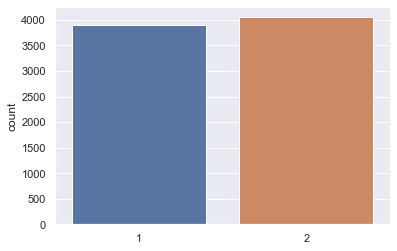

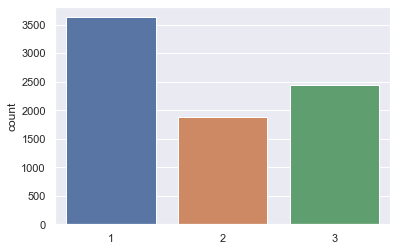

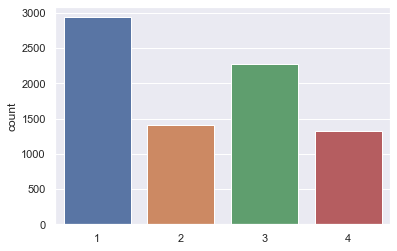

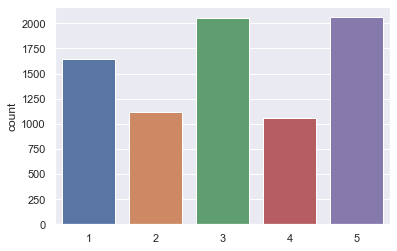

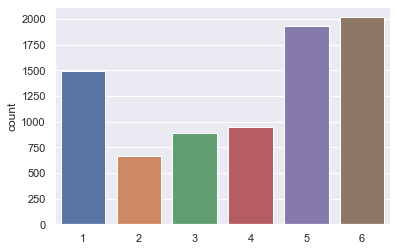

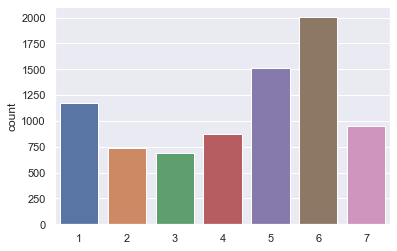

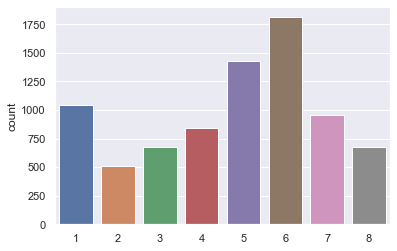

In [ ]:
# menghitung keseimbangan data
import seaborn as sns
import matplotlib.pyplot as plt

for i in doc_topic:
    sns.countplot(i)
    plt.show()

In [ ]:
n_topics = 4
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)

C:\Users\Acer\AppData\Local\Temp/ipykernel_8864/137865484.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  doc_topic = [a.argmax()+1 for a in tqdm(vsm_topics)]


  0%|          | 0/7 [00:00<?, ?it/s]

<AxesSubplot:ylabel='count'>

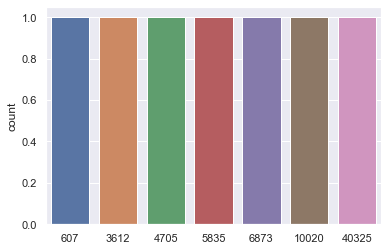

In [ ]:
doc_topic = [a.argmax()+1 for a in tqdm(vsm_topics)]
doc_topic[:10]
sns.countplot(doc_topic)

In [ ]:
import time
import numpy as np
import sklearn
import imblearn

In [ ]:
Top_Words=20
print('Printing top {0} Topics, with tpo {1} Words:'.format(n_topics, Top_Words))
ittc.print_Topics(lda, tf_term, n_topics, Top_Words)

Printing top 4 Topics, with tpo 20 Words:
Topic #1:
jaringan luar baca cerita versi lama kecewa suka batas dalam enak sekarang perpustakaan perbarui bagus premium baru bayar balikin aplikasi
Topic #2:
cerita tidak unduh bagus lama aplikasi baca baru hilang novel hapus suka kesal eror tulis seru cari nulis senang perbarui
Topic #3:
bagus cerita suka aplikasi baca masuk akun tulis email coba halusinasi keluar keren tarik bintang eror ganti sandi susah salah
Topic #4:
iklan baca jelek fitur ganggu kecewa bagus bab tulis bayar enak komentar orang bintang bagian perbarui nyaman pindah premium hilang
